In [71]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from scipy.stats import linregress

#--------Samanthas analysis--------

# File to Load (Remember to Change These)
candy_file = "Resources/candy-data.csv"

# Read School and Student Data File and store into Pandas DataFrames
candy_data = pd.read_csv(candy_file)

In [2]:
#Filter chocoalte subset
chocolate_subset=candy_data[candy_data['chocolate']==1]

#Filter non-chocolate subset
non_chocolate_subset=candy_data[candy_data['chocolate']==0]

#Filter fruity subset
fruity_subset=candy_data[candy_data['fruity']==1]

#Filter for caramel
caramel_subset=candy_data[candy_data['caramel']==1]

#Filter for peanutyalmondy
peanutyalmondy_subset=candy_data[candy_data['peanutyalmondy']==1]

#Filter for nougat
nougat_subset=candy_data[candy_data['nougat']==1]

#Filter for crispedricewafer
crispedricewafer_subset=candy_data[candy_data['crispedricewafer']==1]

#Filter for hard
hard_subset=candy_data[candy_data['hard']==1]

#Filter for bar
bar_subset=candy_data[candy_data['bar']==1]

#Filter for pluribus - Is it one of many candies in a bag or box?
pluribus_subset=candy_data[candy_data['pluribus']==1]

In [3]:
 # Place all of the data found into a summary DataFrame
type_totals = pd.DataFrame({"Chocolate": [len(chocolate_subset)],
                              "Fruity": [len(fruity_subset)],
                              "Caramel": [len(caramel_subset)],
                              "Peanutyalmondy": [len(peanutyalmondy_subset)],
                                "Nougat": [len(nougat_subset)],
                                 "Crispedricewafer": [len(crispedricewafer_subset)], 
                            "Hard": [len(hard_subset)],
                           "Bar": [len(bar_subset)],
                           "Pluribus": [len(pluribus_subset)]})

type_totals

,Chocolate,Fruity,Caramel,Peanutyalmondy,Nougat,Crispedricewafer,Hard,Bar,Pluribus
0,37,38,14,14,7,7,15,21,44


In [4]:
top_ten=candy_data.sort_values(by=['winpercent'], ascending=False)
top_ten=top_ten[0:10]
top_ten

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
53,Reese's pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
54,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
32,Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


In [5]:
bottom_ten=candy_data.sort_values(by=['winpercent'])
bottom_ten=bottom_ten[0:10]
bottom_ten

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
44,Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
72,Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
26,Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,29.703691
71,Sugar Daddy,0,0,1,0,0,0,0,0,0,0.418,0.325,32.230995
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550
19,Haribo Happy Cola,0,0,0,0,0,0,0,0,1,0.465,0.465,34.158958


In [6]:
# Place top ten summary into dataFrame
top_totals = pd.DataFrame({"Chocolate": [len(top_ten[top_ten['chocolate']==1])],
                              "Fruity": [len(top_ten[top_ten['fruity']==1])],
                              "Caramel": [len(top_ten[top_ten['caramel']==1])],
                              "Peanutyalmondy": [len(top_ten[top_ten['peanutyalmondy']==1])],
                                "Nougat": [len(top_ten[top_ten['nougat']==1])],
                                 "Crispedricewafer": [len(top_ten[top_ten['crispedricewafer']==1])], 
                            "Hard": [len(top_ten[top_ten['hard']==1])],
                           "Bar": [len(top_ten[top_ten['bar']==1])],
                           "Pluribus": [len(top_ten[top_ten['pluribus']==1])]})

top_totals

,Chocolate,Fruity,Caramel,Peanutyalmondy,Nougat,Crispedricewafer,Hard,Bar,Pluribus
0,10,0,3,7,2,2,0,5,2


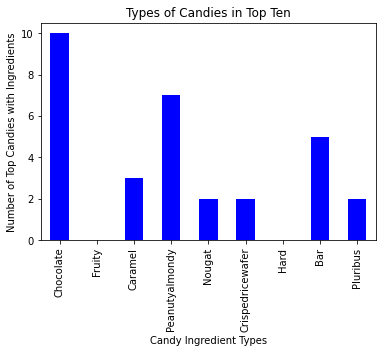

In [76]:
# Generate a bar plot showing the top totals by content

#list(top_totals.columns)
top_list=top_totals.iloc[0]

#top_frame=top_list.to_frame()
top_frame=top_list.to_frame()
top_names=top_frame.index

# #Generate bar chart
top_df = pd.DataFrame({'Candy Ingredient Types':top_names, 'Number of Top Candies with Ingredients':top_list})
top_bar = top_df.plot.bar(x='Candy Ingredient Types', y='Number of Top Candies with Ingredients', rot=90, title="Types of Candies in Top Ten", legend=False, color='b')
top_bar.set_ylabel('Number of Top Candies with Ingredients')

#Save the figure as PNG
plt.savefig('Images/Types of Candies in Top Ten')

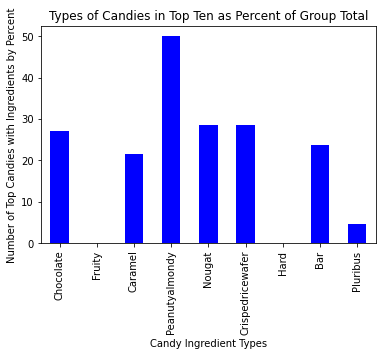

In [77]:
#Generate top list as percent
top_percent=(top_totals/type_totals)*100

# Generate a bar plot showing the top totals by content

#list(top_totals.columns)
top_percent_list=top_percent.iloc[0]

#top_frame=top_list.to_frame()
top_percent_frame=top_percent_list.to_frame()
top_percent_names=top_percent_frame.index

# #Generate bar chart
top_perfect_df = pd.DataFrame({'Candy Ingredient Types':top_percent_names, 'Number of Top Candies with Ingredients':top_percent_list})
top_percent_bar = top_perfect_df.plot.bar(x='Candy Ingredient Types', y='Number of Top Candies with Ingredients', rot=90, title="Types of Candies in Top Ten as Percent of Group Total", legend=False, color='b')
top_percent_bar.set_ylabel('Number of Top Candies with Ingredients by Percent')

#Save the figure as PNG
plt.savefig('Images/Types of Candies in Top Ten as Percent of Group Total')

In [9]:
# Place bottom ten summary into dataFrame
bottom_totals = pd.DataFrame({"Chocolate": [len(bottom_ten[bottom_ten['chocolate']==1])],
                              "Fruity": [len(bottom_ten[bottom_ten['fruity']==1])],
                              "Caramel": [len(bottom_ten[bottom_ten['caramel']==1])],
                              "Peanutyalmondy": [len(bottom_ten[bottom_ten['peanutyalmondy']==1])],
                                "Nougat": [len(bottom_ten[bottom_ten['nougat']==1])],
                                 "Crispedricewafer": [len(bottom_ten[bottom_ten['crispedricewafer']==1])], 
                            "Hard": [len(bottom_ten[bottom_ten['hard']==1])],
                           "Bar": [len(bottom_ten[bottom_ten['bar']==1])],
                           "Pluribus": [len(bottom_ten[bottom_ten['pluribus']==1])]})

bottom_totals

,Chocolate,Fruity,Caramel,Peanutyalmondy,Nougat,Crispedricewafer,Hard,Bar,Pluribus
0,0,4,2,1,0,0,2,0,7


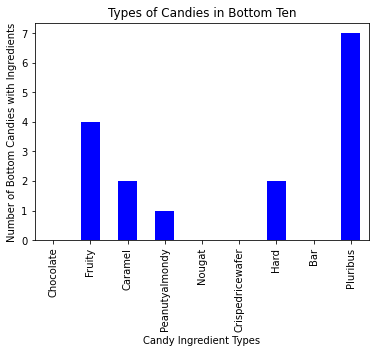

In [78]:
# Generate a bar plot showing the bottom totals by content

#list(top_totals.columns)
bottom_list=bottom_totals.iloc[0]

#top_frame=top_list.to_frame()
bottom_frame=bottom_list.to_frame()
bottom_names=bottom_frame.index

# #Generate bar chart
bottom_df = pd.DataFrame({'Candy Ingredient Types':bottom_names, 'Number of Bottom Candies with Ingredients':bottom_list})
bottom_bar = bottom_df.plot.bar(x='Candy Ingredient Types', y='Number of Bottom Candies with Ingredients', rot=90, title="Types of Candies in Bottom Ten", legend=False, color='b')
bottom_bar.set_ylabel('Number of Bottom Candies with Ingredients')

#Save the figure as PNG
plt.savefig('Images/Types of Candies in Bottom Ten')

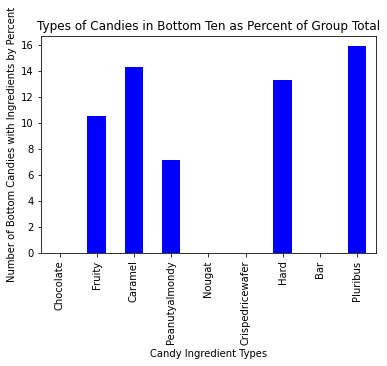

In [79]:
#Generate top list as percent
bottom_percent=(bottom_totals/type_totals)*100

# Generate a bar plot showing the top totals by content

#list(top_totals.columns)
bottom_percent_list=bottom_percent.iloc[0]

#top_frame=top_list.to_frame()
bottom_percent_frame=bottom_percent_list.to_frame()
bottom_percent_names=bottom_percent_frame.index

# #Generate bar chart
bottom_percent_df = pd.DataFrame({'Candy Ingredient Types':bottom_percent_names, 'Number of Bottom Candies with Ingredients':bottom_percent_list})
bottom_percent_bar = bottom_percent_df.plot.bar(x='Candy Ingredient Types', y='Number of Bottom Candies with Ingredients', rot=90, title="Types of Candies in Bottom Ten as Percent of Group Total", legend=False, color='b')
bottom_percent_bar.set_ylabel('Number of Bottom Candies with Ingredients by Percent')

#Save the figure as PNG
plt.savefig('Images/Types of Candies in Bottom Ten as Percent of Group Total')

In [14]:
#Show subset of top percentile candies - The percentile of sugar it falls under within the data set
top_sugar=candy_data.sort_values(by=['sugarpercent'], ascending=False)
top_sugar=top_sugar[0:10]
top_sugar

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
54,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550
38,Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.965,0.860,64.353340
61,Skittles wildberry,0,1,0,0,0,0,0,0,1,0.941,0.220,55.103695
60,Skittles original,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140
17,Gobstopper,0,1,0,0,0,0,1,0,1,0.906,0.453,46.783348
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
34,Mike & Ike,0,1,0,0,0,0,0,0,1,0.872,0.325,46.411716
84,Whoppers,1,0,0,0,0,1,0,0,1,0.872,0.848,49.524113


In [15]:
#Show subset of bottom percentile candies - The percentile of sugar it falls under within the data set
bottom_sugar=candy_data.sort_values(by=['sugarpercent'])
bottom_sugar=bottom_sugar[0:10]
bottom_sugar

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
51,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
30,Lemonhead,0,1,0,0,0,0,1,0,0,0.046,0.104,39.141056
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
66,Sour Patch Kids,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998
67,Sour Patch Tricksters,0,1,0,0,0,0,0,0,1,0.069,0.116,52.825947
48,Pixie Sticks,0,0,0,0,0,0,0,0,1,0.093,0.023,37.722336
26,Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898


In [16]:
sugar_list=candy_data['sugarpercent']
win_list=candy_data['winpercent']
price_list=candy_data['pricepercent']

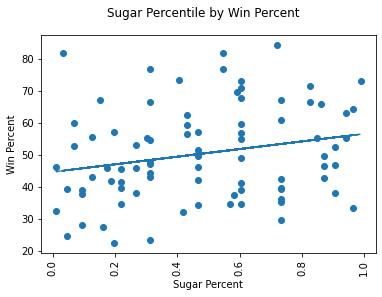

In [81]:
#Calculate linear regression model
# Perform a linear regression on average tumor volume versus weight
slope, candy_int, sugar_r, p, std_err = st.linregress(sugar_list, win_list)

# Create equation of line to calculate predicted violent crime rate
candy_fit = slope * sugar_list + candy_int

plt.scatter(sugar_list, win_list)
plt.plot(sugar_list, candy_fit,"--")
plt.xticks(rotation=90)
plt.suptitle("Sugar Percentile by Win Percent")
plt.xlabel('Sugar Percent')
plt.ylabel('Win Percent')

#Save the figure as PNG
plt.savefig('Images/Sugar Percentile by Win Percent.png')

plt.show()

In [18]:
sugar_r

0.22915065712800642

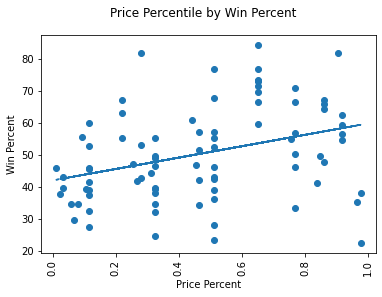

In [32]:
#Calculate linear regression model
# Perform a linear regression on average tumor volume versus weight
slope, candy_int, price_r, p, std_err = st.linregress(price_list, win_list)

# Create equation of line to calculate predicted violent crime rate
candy_fit = slope * price_list + candy_int

plt.scatter(price_list, win_list)
plt.plot(price_list, candy_fit,"--")
plt.xticks(rotation=90)
plt.suptitle("Price Percentile by Win Percent")
plt.xlabel('Price Percent')
plt.ylabel('Win Percent')

#Save the figure as PNG
plt.savefig('Images/Price Percentile by Win Percent.png')

plt.show()

In [20]:
price_r

0.34532540996768496

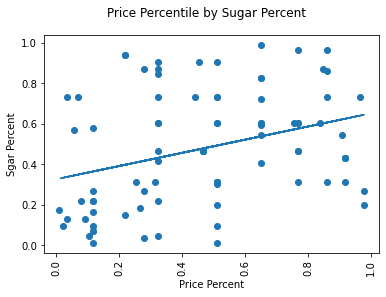

In [82]:
#Calculate linear regression model
# Perform a linear regression on sugar and wins
slope, candy_int, r, p, std_err = st.linregress(price_list, sugar_list)

# Create equation of line to calculate predicted violent crime rate
candy_fit = slope * price_list + candy_int

plt.scatter(price_list, sugar_list)
plt.plot(price_list, candy_fit,"--")
plt.xticks(rotation=90)
plt.suptitle("Price Percentile by Sugar Percent")
plt.xlabel('Price Percent')
plt.ylabel('Sgar Percent')

#Save the figure as PNG
plt.savefig('Images/Price Percentile by Sugar Percent.png')

plt.show()

In [22]:
r

0.3297063875889548

In [23]:
#Generate average wins of chocolate candies
chocolate_mean=chocolate_subset['winpercent'].mean()

#Generate average wins of non-chocolate candies
non_chocolate_mean=non_chocolate_subset['winpercent'].mean()

In [24]:
 # Place all of the data found into a summary DataFrame
chocolate_v_non = pd.DataFrame({"Chocolate Average Wins": [chocolate_mean],
                              "Non-Chocolate Average Wins": [non_chocolate_mean]})

chocolate_v_non

,Chocolate Average Wins,Non-Chocolate Average Wins
0,60.921529,42.142257


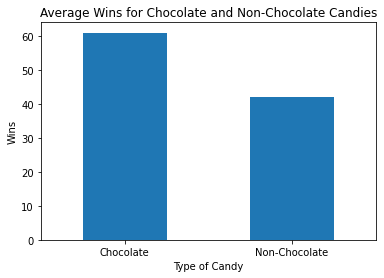

In [83]:
chocolate_v_non_bar = pd.DataFrame({'Type of Candy': ['Chocolate', 'Non-Chocolate'], 'Wins': [61, 42]})
ax = chocolate_v_non_bar.plot.bar(x='Type of Candy', y='Wins', title="Average Wins for Chocolate and Non-Chocolate Candies", rot=0, legend=False)
ax.set_ylabel('Wins')

#Save the figure as PNG
plt.savefig('Images/Average Wins for Chocolate and Non-Chocolate Candies.png')

In [27]:
print(f'Total n of chocolate subset is {len(chocolate_subset)} and the total n of the non-chocolate subset is {len(non_chocolate_subset)}')

#--------End of Samantha's analysis--------

Total n of chocolate subset is 37 and the total n of the non-chocolate subset is 48


In [35]:
#--------Chrstine's analysis--------
candydata = pd.read_csv('Resources/candydata.csv')
print(candydata)

#Importing candydata

   State            Top Candy   Pounds         Second Place  Pounds.1  \
0     AK                 Twix     4908            Milky Way      4072   
1     AL           Candy Corn   115269            Starburst    111280   
2     AR       Jolly Ranchers   228645         Butterfinger    201845   
3     AZ          Hot Tamales   751772       Hershey Kisses    732991   
4     CA             Skittles  1509827         Reese's Cups   1059223   
5     CO       Hershey Kisses   129826                 Twix    127840   
6     CT            Milky Way     2987           Almond Joy      2278   
7     DC                M&M's    27546         Tootsie Pops     24725   
8     DE             Skittles    21336          Life Savers     16703   
9     FL             Skittles   598285         Reese's Cups    501926   
10    GA         Swedish Fish   145827       Jolly Ranchers    124872   
11    HI             Skittles    28091  Hershey's Mini Bars     25783   
12    IA                M&M's    67829         Rees

In [36]:
candydata.head() #I seem to have an extra column, Unamed:10

,State,Top Candy,Pounds,Second Place,Pounds.1,Third Place,Pounds.2,State Total,Population (in Millions),Pounds Per Million,Unnamed: 10
0,AK,Twix,4908,Milky Way,4072,Blow Pops,3988,12968,0.7,18525.71429,NaN
1,AL,Candy Corn,115269,Starburst,111280,Skittles,98771,325320,4.9,66391.83673,NaN
2,AR,Jolly Ranchers,228645,Butterfinger,201845,Skittles,76353,506843,3.0,168947.66670,NaN
3,AZ,Hot Tamales,751772,Hershey Kisses,732991,Snickers,682562,2167325,7.3,296893.83560,NaN
4,CA,Skittles,1509827,Reese's Cups,1059223,M&M's,1009388,3578438,39.5,90593.36709,NaN


In [37]:
candydata = candydata.drop(columns=['Unnamed: 10']) #dropped extra column

In [38]:
for col in candydata.columns: 
    print(col)   #checking for extra column/making sure it got dropped.

State
Top Candy
Pounds
Second Place
Pounds.1
Third Place
Pounds.2
State Total
Population (in Millions)
Pounds Per Million


In [39]:
candydata.head() #I pre-sorted the data, using Excel, and summed up the amount of candy consumed by each state, and then added the population, in millions.
#The final column is the amount of candy eaten, per 1 million people.
#Pounds = the amount, in pounds, of the candy's top seller.
#Pounds.1 = the amount of the state's second most purchased candy.
#Pounds.2 = the amount of the state's third most purchased candy.
#This isn't a comprehensive table that measures ALL candy consumed by the people of state.
#It measure the total sales of the top three kinds of candy in each state.

,State,Top Candy,Pounds,Second Place,Pounds.1,Third Place,Pounds.2,State Total,Population (in Millions),Pounds Per Million
0,AK,Twix,4908,Milky Way,4072,Blow Pops,3988,12968,0.7,18525.71429
1,AL,Candy Corn,115269,Starburst,111280,Skittles,98771,325320,4.9,66391.83673
2,AR,Jolly Ranchers,228645,Butterfinger,201845,Skittles,76353,506843,3.0,168947.66670
3,AZ,Hot Tamales,751772,Hershey Kisses,732991,Snickers,682562,2167325,7.3,296893.83560
4,CA,Skittles,1509827,Reese's Cups,1059223,M&M's,1009388,3578438,39.5,90593.36709


In [40]:
#Now I want to see what state has bought the most candy.
#Here is the total, in pounds, of candy that each state has bought.
#I wanted to add some way to measure the amount of candy purchased, based on population, because otherwise the top five would be California and Texas because they have the most people.
#Arizona, however, would be number three.

#So Arizona buys about a third of a pound of Halloween candy per person. And what they buy most is Hot Tamales.
#Utah, Nevada, Kansas and North Dakota round out the top five.

#Illinois is towards the bottom...wooo?
#The most frequently bought Halloween candies here are Sour Patch Kids, Kit Kat and Starburst.

#I also want to point out California's numbers. The people in that state purchased more than 1.5 million pounds of Skittles for Halloween.
#That will come in handy to remember later.

#In retrospect, I should have divided the amount of candy purchased by total population, rather than population in millions.

candydata.groupby(by="Pounds Per Million").max()
topcandydata = candydata.groupby(by="Pounds Per Million").max()
topcandydata.sort_values(by = "Pounds Per Million", ascending=False)

,State,Top Candy,Pounds,Second Place,Pounds.1,Third Place,Pounds.2,State Total,Population (in Millions)
Pounds Per Million,,,,,,,,,
296893.835600,AZ,Hot Tamales,751772,Hershey Kisses,732991,Snickers,682562,2167325,7.3
285771.875000,UT,Jolly Ranchers,413099,Tootsie Pops,260378,Candy Corn,240993,914470,3.2
263636.774200,NV,Hershey Kisses,310974,Hot Tamales,286464,Candy Corn,219836,817274,3.1
218405.862100,KS,Reese's Cups,229857,M&M's,213784,Snickers,189736,633377,2.9
210581.250000,ND,Candy Corn,61837,Hot Tamales,56745,Jolly Ranchers,49883,168465,0.8
168947.666700,AR,Jolly Ranchers,228645,Butterfinger,201845,Skittles,76353,506843,3.0
131858.333300,VT,Skittles,34670,M&M's,24536,Milky Way,19909,79115,0.6
118063.571400,NH,M&M's,69692,Starburst,59822,Jolly Ranchers,35775,165289,1.4
117810.526300,NE,Sour Patch Kids,98486,Salt Water Taffy,89734,Twix,35620,223840,1.9


In [41]:
#Now let's see this visualized.

In [44]:
candyplot = topcandydata.reset_index("Pounds Per Million") #Resetting the index so that I can plot with Pounds Per Million

poundsPerState = candyplot[["State", "Pounds Per Million"]]

poundsPerState  #I stripped all data, other than State and Pounds Per Million. 

,State,Pounds Per Million
0,CT,1956.285714
1,OK,11879.743590
2,MD,15354.500000
3,NY,18401.128210
4,AK,18525.714290
5,MO,19471.311480
6,TN,21103.823530
7,NC,23702.190480
8,MA,27665.507250
9,MI,32860.606060


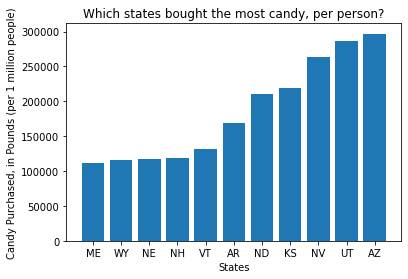

In [84]:
topState = poundsPerState[40:51]

#I tried to plot all 50 states, but it was incomprehensible and garbled. So here are the top five states.

plt.bar(topState['State'], topState['Pounds Per Million'])
plt.xlabel("States")
plt.ylabel("Candy Purchased, in Pounds (per 1 million people)")
plt.title("Which states bought the most candy, per person?")
plt.savefig("Images/PoundsPerState.png")
#Here's a bar graph of the state's purchasing the most candy.
#People in Arizona and Utah purchase almost three times as much candy as people in Maine, which is number 10 in the top purchaing states list.
#Nevada is up there, too, with about 2.5 times as much candy as Maine.
#One could come to the conclusion, then, that the southwestern mountain states purchase the most candy.
#Southwestern mountain state = AZ, UT and NV.

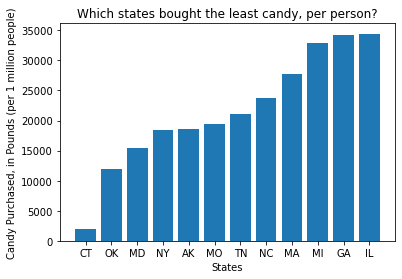

In [85]:
bottomState = poundsPerState[0:12]
plt.bar(bottomState['State'], bottomState['Pounds Per Million'])
plt.xlabel("States")
plt.ylabel("Candy Purchased, in Pounds (per 1 million people)")
plt.title("Which states bought the least candy, per person?")
plt.savefig("Images/BottomPoundsPerState.png")
#The states purchasing the least candy, in pounds, per person, is Connecticut.
#Also at the bottom of this list is Oklahoma, Maryland and New York.
#As you can see, Il is 12th from the bottom.

In [48]:
poundsPerState.describe()

,Pounds Per Million
count,51.000000
mean,80716.867501
std,68536.731254
min,1956.285714
25%,37687.752135
50%,61912.777780
75%,102821.904800
max,296893.835600


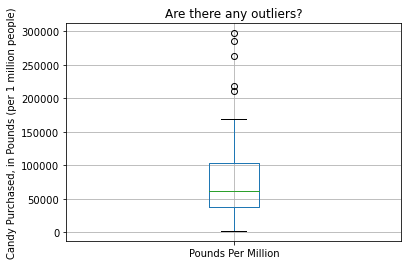

In [86]:
poundsPerState.boxplot(column=['Pounds Per Million'])
plt.ylabel("Candy Purchased, in Pounds (per 1 million people)")
plt.title("Are there any outliers?")
plt.savefig("Images/SalesBoxPlot.png")
#I expected to find that Connecticut's sales would make it an outlier, but it is within the lower limit.
#However five of the top purchasing states are outliers.

In [50]:
topCandy = candydata[["Top Candy", "Pounds"]]
#Isolating the values for the amount of each candy purchased.
topCandy

,Top Candy,Pounds
0,Twix,4908
1,Candy Corn,115269
2,Jolly Ranchers,228645
3,Hot Tamales,751772
4,Skittles,1509827
5,Hershey Kisses,129826
6,Milky Way,2987
7,M&M's,27546
8,Skittles,21336
9,Skittles,598285


In [51]:
topPlaceSales = topCandy.groupby('Top Candy').sum()
topPlaceSales

,Pounds
Top Candy,
3 Musketeers,95727
Blow Pops,170236
Butterfinger,119664
Candy Corn,292375
Dubble Bubble Gum,49005
Hershey Kisses,440800
Hershey's Mini Bars,315429
Hot Tamales,751772
Jolly Ranchers,721836


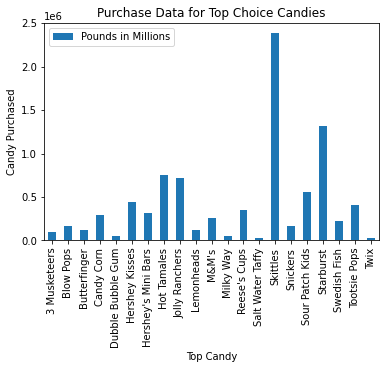

In [87]:
topPlaceSales.reset_index().plot.bar(x='Top Candy', y='Pounds', label='Pounds in Millions')
plt.ylabel("Candy Purchased")
plt.title("Purchase Data for Top Choice Candies")
plt.savefig("Images/CandyPounds.png")
#This is a plot of sales, in millions of pounds of the top-selling candies.
#From this list we see that Skittles has the most sales.
#That is because of California. Skittles was the top-selling candy there.
#In California alone, people buy 1,509,827 pounds of Skittles.
#So more than half of all Skittles sales was from California.
#Other than Skittles and Starburst, sales are fairly evenly distributed.

In [53]:
topPlaceSales.describe()

,Pounds
count,2.100000e+01
mean,4.198391e+05
std,5.464388e+05
min,2.273500e+04
25%,1.157890e+05
50%,2.548390e+05
75%,4.408000e+05
max,2.383036e+06


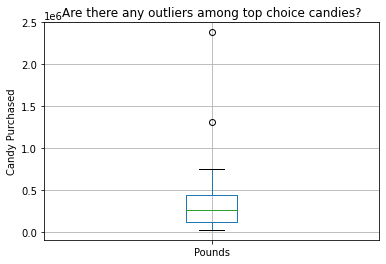

In [88]:
#Is the sales of Skittles an outlier though?

topPlaceSales.boxplot
candyBox = topPlaceSales.boxplot(column=['Pounds'])
plt.ylabel("Candy Purchased")
plt.title("Are there any outliers among top choice candies?")
plt.savefig("Images/CandyBox.png")
#Yes, it is and so is Starburst.
#The amount of Starburst and Skittles purchased exceeds the rest of the Top Candy choices.
#It's even almost twice as much as the third place winner, Hot Tamales.

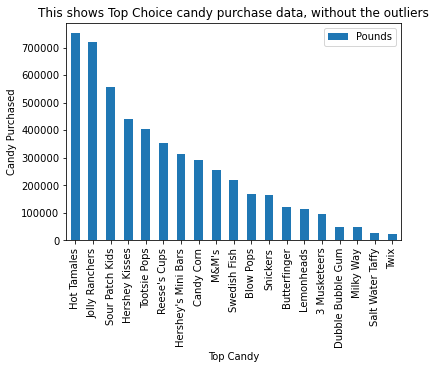

In [89]:
adjustedcandy = topPlaceSales.sort_values(by = "Pounds", ascending=False)
adjustedcandy = adjustedcandy[2:21]

adjustedcandy.plot.bar(label='Pounds in Millions')
plt.ylabel("Candy Purchased")
plt.title("This shows Top Choice candy purchase data, without the outliers")
plt.savefig("Images/AdjustedCandyBar.png")
#Here we see a slightly better distribution. Hot Tamales and Jolly Ranchers have the most pounds purchased here.
#Which is interesting.
#There is nothing with the attribute "chocolatey" in the top five!

In [59]:
#I just want to point out that people bought more candy corn than M&M's, Snickers, Butterfingers, 3 Musketeers, Milky Way and Twix.
#Also, who buys Salt Water Taffy for Halloween?

adjustedcandy.describe()

,Pounds
count,19.000000
mean,269565.894737
std,222742.058437
min,22735.000000
25%,105758.000000
50%,221081.000000
75%,377907.000000
max,751772.000000


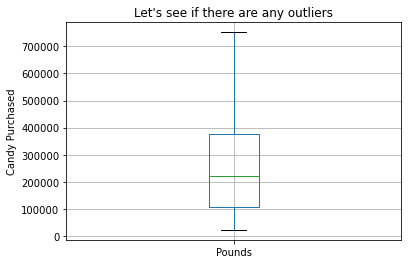

In [90]:
adjustedcandy.boxplot
adjustedcandyBox = adjustedcandy.boxplot(column=['Pounds'])
plt.ylabel("Candy Purchased")
plt.title("Let's see if there are any outliers")
plt.savefig("Images/AdjustedCandyBox.png")
#If you were wondering -- no outliers. I thought the bottom choice would be on the low side, but i was wrong.

In [63]:
secondCandy = candydata[["Second Place", "Pounds.1"]]
secondPlaceSales = secondCandy.groupby('Second Place').sum()

thirdCandy = candydata[["Third Place", "Pounds.2"]] 
thirdPlaceSales = thirdCandy.groupby('Third Place').sum()

#I'm collecting data of Second and Thid Place Sales so I can get a better idea of total sales for each candy.


reNameTop = topCandy.rename(columns={"Top Candy": "Candy"})
#I'm setting to a variable the three dataframes with renamed columns so I can concat them.
reNameSecond = secondCandy.rename(columns={"Second Place": "Candy", "Pounds.1": "Pounds"})
reNameThird = thirdCandy.rename(columns={"Third Place": "Candy", "Pounds.2": "Pounds"})


totalCandySales = pd.concat([reNameTop, reNameSecond, reNameThird])
 
#Here is a new dataframe that should give me total sales of the first, second and third place candies.

#And here I perform a groupby to add up the total purchases for each candy.

salesbycandy = totalCandySales.groupby('Candy').sum()
salesbycandy

,Pounds
Candy,
3 Musketeers,95727
Almond Joy,39060
Blow Pops,334687
Butterfinger,582276
Candy Corn,1306444
Dubble Bubble Gum,151835
Hershey Kisses,1204214
Hershey's Mini Bars,341212
Hot Tamales,1581866


In [64]:
topCandySales = salesbycandy.sort_values(by='Pounds', ascending=False)
topCandySales

#And now it's sorted from most sales to least.

,Pounds
Candy,
Skittles,3295512
Reese's Cups,3277456
Starburst,2318761
M&M's,2092115
Hot Tamales,1581866
Candy Corn,1306444
Snickers,1297302
Sour Patch Kids,1215193
Hershey Kisses,1204214


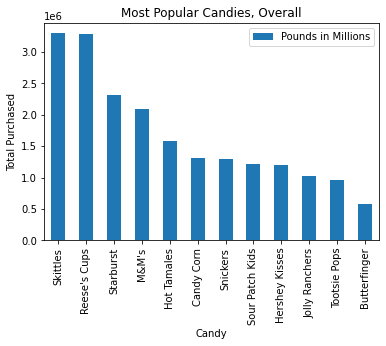

In [91]:
plotCandySales = topCandySales[0:12].reset_index()

plotCandySales.plot.bar(x='Candy', y='Pounds', label='Pounds in Millions')
plt.ylabel("Total Purchased")
plt.title("Most Popular Candies, Overall")

plt.savefig("Images/PlotCandySales.png")

#This graph uses the data from First, Second and Third Place to approximate the amount of each candy purchased

In [66]:
#Above is a chart showing sales for the top three candies in all 50 states.
#The top five is Skittles -- again because of California, Reese's Cups, Starburst, M&M's and Hot Tamales, on the strength of sales in Arizona.
#Sadly, Candy Corn is #5.
#Candy Corn, we decided is the fruitcake of Halloween.

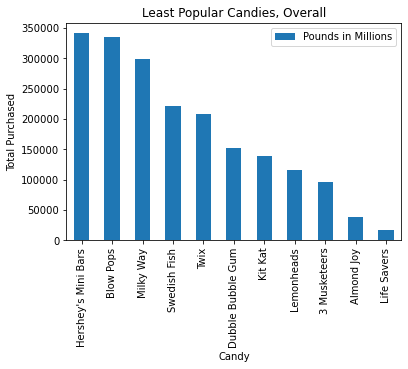

In [92]:
bottomCandySales = topCandySales[13:24].reset_index()

bottomCandySales.plot.bar(x='Candy', y='Pounds', label='Pounds in Millions')
plt.ylabel("Total Purchased")
plt.title("Least Popular Candies, Overall")
plt.savefig("Images/BottomCandySales.png")
#I'm calling this LEAST popular, but these candies were still in the top three of all candy purchased.
#So it is not the most fitting name.
#However, my data for candy purchases isn't comprehensive. All I have is data on the three most popular candies, by state.
#So being on this list means the candy is fairly popular.

In [69]:
#Do states with more kids buy more candy for Halloween?


averageage = pd.read_csv('Resources/ageunder18.csv')
averageageDF = pd.DataFrame(averageage)

#Here is a new data set of the percentage of a state's population that is under the age of 18.

In [70]:
ageCandy = pd.merge(poundsPerState, averageageDF, on='State')
ageCandyRename = ageCandy.rename(columns={"Age Under 18": "Percent Under 18"})
#For clarification, I wanted to rename column Age Under 18 to Percentage Under 18

ageCandy

,State,Pounds Per Million,Age Under 18
0,CT,1956.285714,21.7
1,OK,11879.743590,25.6
2,MD,15354.500000,23.3
3,NY,18401.128210,21.7
4,AK,18525.714290,25.9
5,MO,19471.311480,23.6
6,TN,21103.823530,23.5
7,NC,23702.190480,23.5
8,MA,27665.507250,20.9
9,MI,32860.606060,22.7


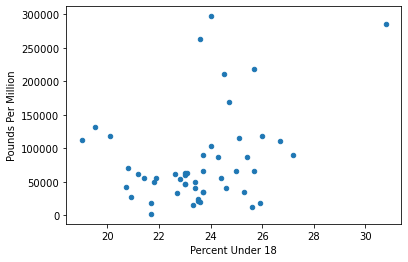

In [93]:
ageCandyRename.plot.scatter(x="Percent Under 18",
                      y='Pounds Per Million')
plt.savefig("Images/ScatterPounds.png")

In [73]:
ageCandyRename.corr(method='pearson')

,Pounds Per Million,Percent Under 18
Pounds Per Million,1.000000,0.330579
Percent Under 18,0.330579,1.000000


In [74]:
#Using Pearson's Correlation Coefficient, it appears that there is a weak correlation between how much of a state's population is under 18 and how much candy they buy for Halloween.
#Although I would point out that Utah has the highest percentage of kids and is one of the states purchaing the most candy.


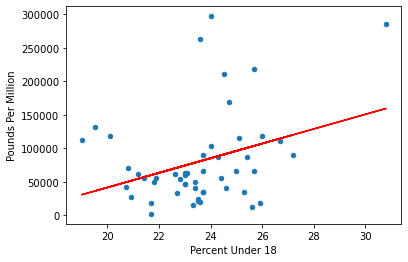

In [75]:
ageCandyRename.plot.scatter(x="Percent Under 18",
                      y='Pounds Per Million')
x_values = ageCandyRename["Percent Under 18"]
y_values = ageCandyRename["Pounds Per Million"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")


#Here is the scatterplot, with the linear regression for relationship visualization.